# Projeto 7: Classificação de roupas

# Etapa 1: Importação das bibliotecas

In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.7.0-dev20210724'

# Etapa 2: Carregamento da base de dados

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
fashion_train_df = pd.read_csv('../content/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('../content/fashion-mnist-test.csv', sep = ',')

FileNotFoundError: [Errno 2] No such file or directory: './content/fashion-mnist-train.csv'

# Etapa 3: Visualização dos dados

In [ ]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [ ]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
training.shape

(60000, 785)

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

In [ ]:
def set_title(argument) -> str:
    index = int(argument)
    switcher = {
        0: 'T-shirt',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle Boot'
    }
    # Get from switcher dictionary
    func = switcher.get(index, lambda: "Invalid Index")
    # Return
    return func

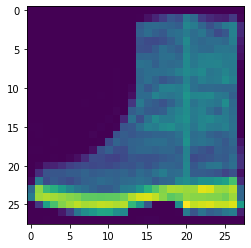

In [ ]:
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape((28,28)));
#plt.imshow(training[i,1:].reshape((28,28)), cmap='gray');

In [ ]:
label = training[i,0]
label

9.0

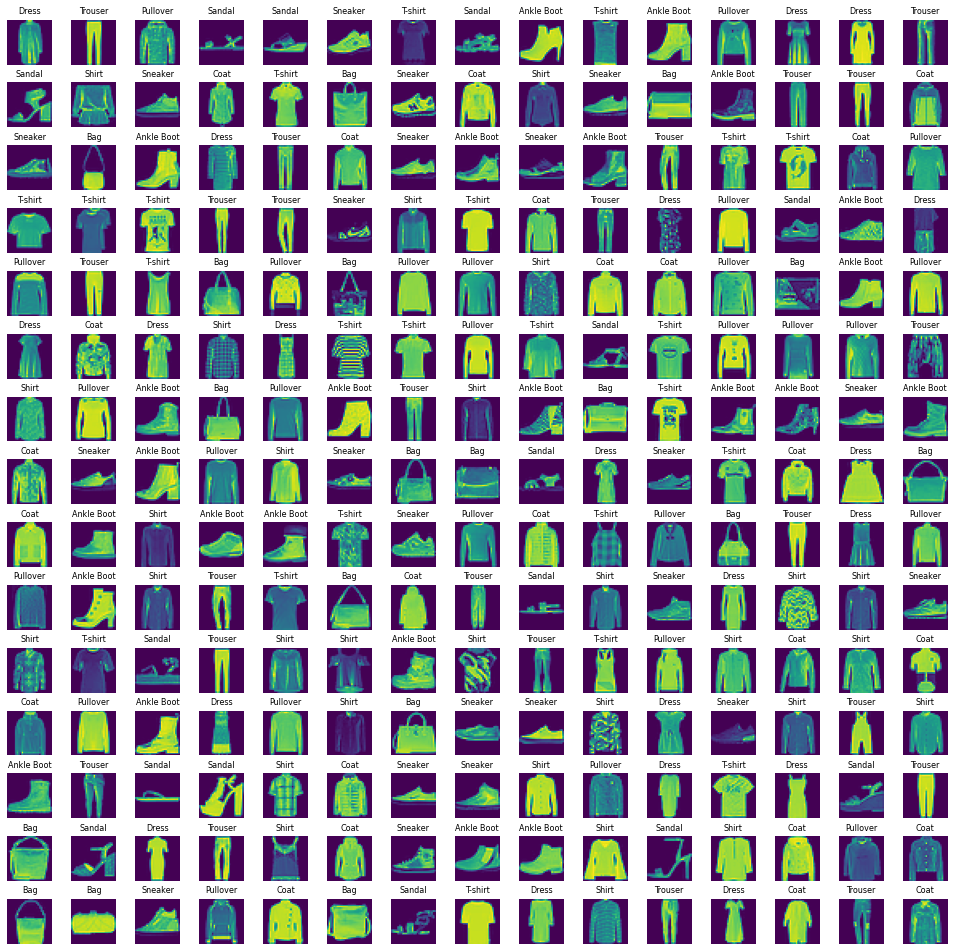

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)))
  axes[i].set_title(set_title(training[index,0]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
n_training

60000

# Etapa 4: Tratamento da base de dados

In [ ]:
X_train = training[:,1:] / 255
y_train = training[:,0]

In [ ]:
X_test = testing[:,1:] / 255
y_test = testing[:,0]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo

In [ ]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    epochs = 150
    history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/150
118/118 [==============================] - 2s 7ms/step - loss: 0.8886 - accuracy: 0.6900
Epoch 2/150
118/118 [==============================] - 1s 8ms/step - loss: 0.5011 - accuracy: 0.8153
Epoch 3/150
118/118 [==============================] - 1s 8ms/step - loss: 0.4210 - accuracy: 0.8500
Epoch 4/150
118/118 [==============================] - 1s 8ms/step - loss: 0.3790 - accuracy: 0.8648
Epoch 5/150
118/118 [==============================] - 1s 8ms/step - loss: 0.3515 - accuracy: 0.8751
Epoch 6/150
118/118 [==============================] - 1s 8ms/step - loss: 0.3238 - accuracy: 0.8846
Epoch 7/150
118/118 [==============================] - 1s 8ms/step - loss: 0.3131 - accuracy: 0.8881
Epoch 8/150
118/118 [==============================] - 1s 8ms/step - loss: 0.3009 - accuracy: 0.8926
Epoch 9/150
118/118 [==============================] - 1s 8ms/step - loss: 0.2882 - accuracy: 0.8973
Epoch 10/150
118/118 [==============================] - 1s 8ms/step - loss: 0.2803 - accura

# Etapa 6: Avaliação do modelo

In [ ]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7781 - accuracy: 0.9147


In [ ]:
evaluation

[0.778083324432373, 0.9146999716758728]

In [ ]:
predictions = cnn.predict(x=X_test)
predictions


array([[1.00000000e+00, 1.41851342e-30, 1.32690390e-15, ...,
        4.93562481e-34, 4.89360112e-23, 1.66024949e-33],
       [1.03996926e-32, 1.00000000e+00, 6.89912374e-34, ...,
        0.00000000e+00, 3.03936570e-37, 0.00000000e+00],
       [6.81311125e-03, 2.93647747e-19, 9.93186831e-01, ...,
        2.02106056e-26, 5.39917949e-25, 1.54411516e-31],
       ...,
       [4.14970914e-38, 0.00000000e+00, 1.36605742e-28, ...,
        3.14319177e-34, 1.00000000e+00, 0.00000000e+00],
       [4.72844988e-07, 2.07852839e-14, 2.96986760e-14, ...,
        2.01181958e-16, 9.92218614e-01, 6.03676137e-11],
       [1.56919350e-06, 9.99957561e-01, 3.89168099e-06, ...,
        3.89250942e-15, 5.80108193e-08, 1.04332820e-10]], dtype=float32)

In [ ]:
def classify_prediction(pred): # np.argmax not working properly
    max = -1
    max_index = -1
    for i in range(0, 10):
        if pred[i] > max:
            max = pred[i]
            max_index = i
    return max_index

def predicted_classes(predictions):
    predicted_class = np.empty(shape=(predictions.shape[0],))
    for i in range(0, predictions.shape[0]):
        predicted_class[i] = classify_prediction(predictions[i])
    return np.array(predicted_class, dtype='float32')

In [ ]:
predicted_classes(predictions)

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

In [ ]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

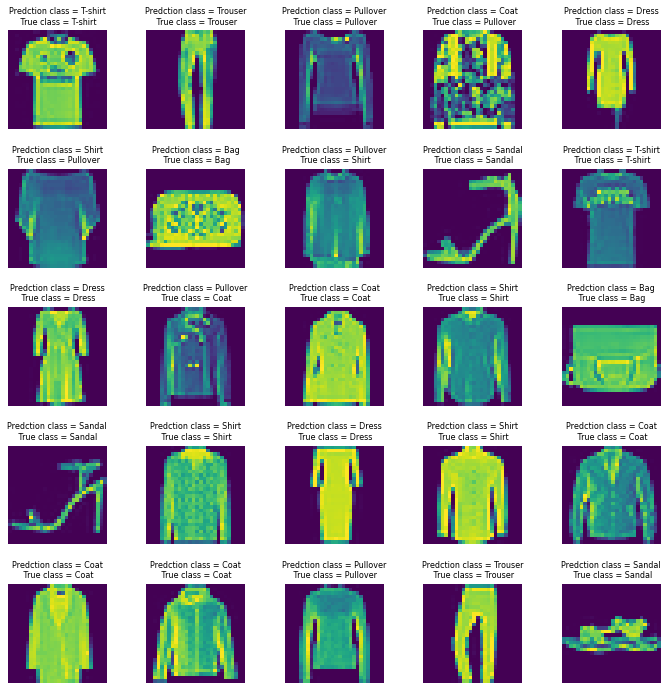

In [ ]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)))
  classification = set_title(classify_prediction(predictions[i]))
  true_class = set_title(y_test[i])
  axes[i].set_title(f"Predction class = {classification}\n True class = {true_class}", fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4);

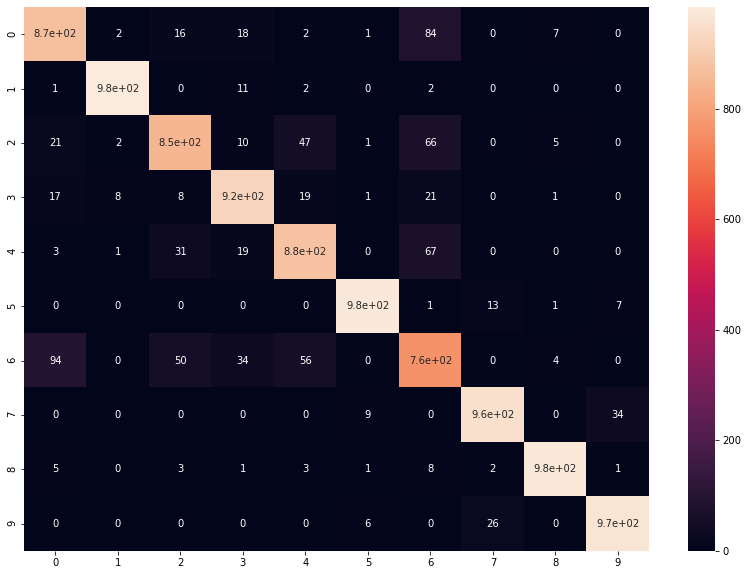

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes(predictions))
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True);

In [ ]:
cm

array([[870,   2,  16,  18,   2,   1,  84,   0,   7,   0],
       [  1, 984,   0,  11,   2,   0,   2,   0,   0,   0],
       [ 21,   2, 848,  10,  47,   1,  66,   0,   5,   0],
       [ 17,   8,   8, 925,  19,   1,  21,   0,   1,   0],
       [  3,   1,  31,  19, 879,   0,  67,   0,   0,   0],
       [  0,   0,   0,   0,   0, 978,   1,  13,   1,   7],
       [ 94,   0,  50,  34,  56,   0, 762,   0,   4,   0],
       [  0,   0,   0,   0,   0,   9,   0, 957,   0,  34],
       [  5,   0,   3,   1,   3,   1,   8,   2, 976,   1],
       [  0,   0,   0,   0,   0,   6,   0,  26,   0, 968]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["{}".format(set_title(i)) for i in range(num_classes)]
target_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
print(classification_report(y_test, predicted_classes(predictions), target_names=target_names))

              precision    recall  f1-score   support

     T-shirt       0.86      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.85      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.87      0.88      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.76      0.76      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

